## Anomaly Detection Project on Retail Price Dataset 

### Overview

This project involves conducting an exploratory data analysis (EDA) using various visualization techniques to analyze the data. In addition to visual analysis, I utilized the Isolation Forest algorithm from SKLearn to detect anomalies in the data.

Some of the critical questions I had initially regarding the sales anomaly detection project:

1. What was the objective of the sales anomaly detection project?

    The objective of the sales anomaly detection project was to identify any unusual patterns or outliers in the price data that could indicate fraudulent or suspicious activity, errors in data entry, or other issues that could impact the accuracy of sales/price reporting


In [1]:
# Load all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')

In [2]:

import pandas as pd
df = pd.read_csv(r'C:\MachineLearning\Retail_Price_AnomalyDetection\RetailPrice.csv')
print(df.head)

<bound method NDFrame.head of        Unnamed: 0  DocumentID        Date   SKU        Price     Discount  \
0               0         716  2019-09-23  1039   381.780000    67.372540   
1               1         716  2019-09-23   853   593.220000     0.000340   
2               2         716  2019-09-23   862   423.730000    -0.001190   
3               3         716  2019-09-23   868   201.700000    35.588140   
4               4         716  2019-09-23  2313   345.760000    61.019660   
...           ...         ...         ...   ...          ...          ...   
33351       33351       13315  2022-11-09  1849  5957.627119  1072.372881   
33352       33352       13316  2022-11-09    30  1271.186441   228.813559   
33353       33353       13317  2022-11-09  2066  1355.932203   244.067797   
33354       33354       13318  2022-11-09  1586  2334.745763   420.254237   
33355       33355       13319  2022-11-09  1408  1368.644068   246.355932   

       Customer  Quantity  
0             1  

In [3]:

print(df.columns)

Index(['Unnamed: 0', 'DocumentID', 'Date', 'SKU', 'Price', 'Discount',
       'Customer', 'Quantity'],
      dtype='object')


In [4]:
print(df.columns)
df.shape
df.dtypes
df.describe()
df.nunique()

Index(['Unnamed: 0', 'DocumentID', 'Date', 'SKU', 'Price', 'Discount',
       'Customer', 'Quantity'],
      dtype='object')


Unnamed: 0    33356
DocumentID    15752
Date           1165
SKU            2905
Price          8964
Discount       7623
Customer        606
Quantity        115
dtype: int64

2. How did I approach the exploratory data analysis (EDA) of the sales data?
   
    To approach the exploratory data analysis (EDA) of the Price data, I began by reviewing the data to understand the structure and format, checking for any missing or incomplete data, and identifying any potential outliers or anomalies. I then explored basic statistical measures such as mean, median, and standard deviation to get an idea of the overall distribution of the data.



Text(0, 0.5, 'Categories')

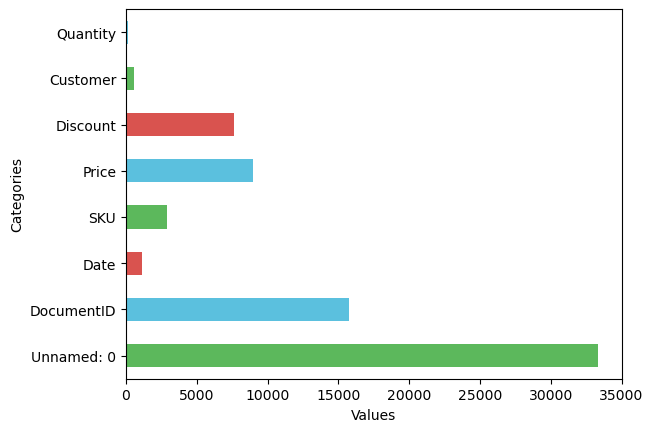

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.show()
df.nunique().plot.barh(color=['#5cb85c','#5bc0de','#d9534f'])
#plt.barh(x,y)
plt.xlabel("Values")
plt.ylabel('Categories')


In [6]:
df.describe()

,Unnamed: 0,DocumentID,SKU,Price,Discount,Customer,Quantity
count,33356.000000,33356.000000,33356.000000,33356.000000,33356.000000,33356.000000,33356.000000
mean,16677.500000,8227.577227,1241.273174,2915.716875,591.249968,307.968581,5.760695
std,9629.192126,4028.047727,893.872164,10285.512325,3508.983569,162.675166,19.550559
min,0.000000,0.000000,0.000000,0.000000,-0.004920,0.000000,0.000000
25%,8338.750000,5399.750000,503.000000,661.016949,95.674576,179.000000,2.000000
50%,16677.500000,8733.000000,1008.000000,1203.389830,195.254237,286.000000,4.000000
75%,25016.250000,10857.000000,2078.250000,2572.194915,423.489661,427.000000,4.000000
max,33355.000000,15751.000000,2904.000000,522767.340000,240396.660000,605.000000,1246.000000


3. What visualization techniques did you use to analyze the sales data and detect anomalies?

    To detect anomalies in the sales data, I employed various visualization techniques such as scatter plots, and bar plot to identify any unusual patterns or outliers in the data. 

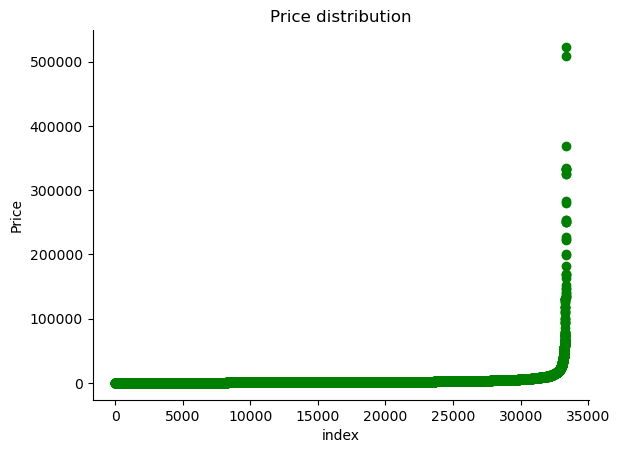

In [7]:
plt.scatter(range(df.shape[0]), np.sort(df['Price'].values),color='green')
plt.xlabel('index')
plt.ylabel('Price')
plt.title("Price distribution")
sns.despine()

In [8]:
df.sort_values('Price', ascending = False).head(8)

,Unnamed: 0,DocumentID,Date,SKU,Price,Discount,Customer,Quantity
29772,29772,14458,2022-07-27,978,522767.340000,240396.660000,418,612.0
31595,31595,14974,2022-10-08,2817,508240.000000,0.000000,418,1.0
27544,27544,15211,2022-05-07,2086,368644.070000,0.000000,433,60.0
31261,31261,14998,2022-10-11,2817,334161.000000,0.000000,418,1.0
15308,15308,0,2020-11-17,541,332574.460000,-0.003959,506,2.0
29827,29827,7218,2022-07-07,611,332559.020000,143715.980000,414,500.0
14003,14003,0,2020-11-16,541,332383.010000,0.000000,506,2.0
29828,29828,7218,2022-07-07,611,331893.899999,143428.550001,414,499.0


In [9]:
"""we create a df_anomaly dataframe for the anomalies and started to collect 
anomalies with 2 rows in the total retai price column"""
df_anomaly = df.sort_values('Price', ascending = False).head(2)
df_anomaly.head()

,Unnamed: 0,DocumentID,Date,SKU,Price,Discount,Customer,Quantity
29772,29772,14458,2022-07-27,978,522767.34,240396.66,418,612.0
31595,31595,14974,2022-10-08,2817,508240.00,0.00,418,1.0


In [10]:
list(df.sort_values('Price', ascending = False).head(2).index)
[29772, 31595]
df = df.drop(list(df.sort_values('Price', ascending = False).head(2).index))
df.sort_values('Price', ascending = False).head(10)

,Unnamed: 0,DocumentID,Date,SKU,Price,Discount,Customer,Quantity
27544,27544,15211,2022-05-07,2086,368644.070000,0.000000,433,60.0
31261,31261,14998,2022-10-11,2817,334161.000000,0.000000,418,1.0
15308,15308,0,2020-11-17,541,332574.460000,-0.003959,506,2.0
29827,29827,7218,2022-07-07,611,332559.020000,143715.980000,414,500.0
14003,14003,0,2020-11-16,541,332383.010000,0.000000,506,2.0
29828,29828,7218,2022-07-07,611,331893.899999,143428.550001,414,499.0
29819,29819,7217,2022-07-28,614,324878.270000,140396.730000,414,500.0
29818,29818,7217,2022-07-28,614,324878.270000,140396.730000,414,500.0
32329,32329,14560,2022-08-25,1443,283302.800000,139537.200000,418,310.0
29770,29770,14458,2022-07-27,1456,279495.900000,178694.100000,418,270.0


In [11]:
df['UnitPrice'] = df['Price'] / df['Quantity']
df.sort_values('UnitPrice',ascending=False).head(8)

,Unnamed: 0,DocumentID,Date,SKU,Price,Discount,Customer,Quantity,UnitPrice
31261,31261,14998,2022-10-11,2817,334161.000000,0.000000,418,1.0,334161.000000
19634,19634,573,2020-09-01,2690,254237.288136,45762.711864,347,1.0,254237.288136
29650,29650,14647,2022-07-13,2817,226500.000000,0.000000,418,1.0,226500.000000
31858,31858,14952,2022-10-06,2817,223806.560000,0.000000,414,1.0,223806.560000
20234,20234,7184,2021-08-19,2546,222968.313559,40134.296441,113,1.0,222968.313559
31598,31598,14974,2022-10-08,2817,200029.000000,0.000000,418,1.0,200029.000000
15308,15308,0,2020-11-17,541,332574.460000,-0.003959,506,2.0,166287.230000
14003,14003,0,2020-11-16,541,332383.010000,0.000000,506,2.0,166191.505000


In [12]:
"""plt.scatter(range(df.shape[0]), np.sort(df['UnitPrice'].values), color='green')
plt.xlabel('index')
plt.ylabel('UnitPrice')
plt.title("Unit Price distribution")
sns.despine()"""

'plt.scatter(range(df.shape[0]), np.sort(df[\'UnitPrice\'].values), color=\'green\')\nplt.xlabel(\'index\')\nplt.ylabel(\'UnitPrice\')\nplt.title("Unit Price distribution")\nsns.despine()'

In [13]:
df_anomaly = df_anomaly.append(
    df.sort_values('UnitPrice',ascending=False).head(1))
df_anomaly.head()

,Unnamed: 0,DocumentID,Date,SKU,Price,Discount,Customer,Quantity,UnitPrice
29772,29772,14458,2022-07-27,978,522767.34,240396.66,418,612.0,NaN
31595,31595,14974,2022-10-08,2817,508240.00,0.00,418,1.0,NaN
31261,31261,14998,2022-10-11,2817,334161.00,0.00,418,1.0,334161.0


In [14]:
df = df.drop(list(df.sort_values('UnitPrice',ascending=False).head(1).index))
df.head()

,Unnamed: 0,DocumentID,Date,SKU,Price,Discount,Customer,Quantity,UnitPrice
0,0,716,2019-09-23,1039,381.78,67.37254,1,1.0,381.78
1,1,716,2019-09-23,853,593.22,0.00034,1,1.0,593.22
2,2,716,2019-09-23,862,423.73,-0.00119,1,1.0,423.73
3,3,716,2019-09-23,868,201.70,35.58814,1,1.0,201.70
4,4,716,2019-09-23,2313,345.76,61.01966,1,1.0,345.76


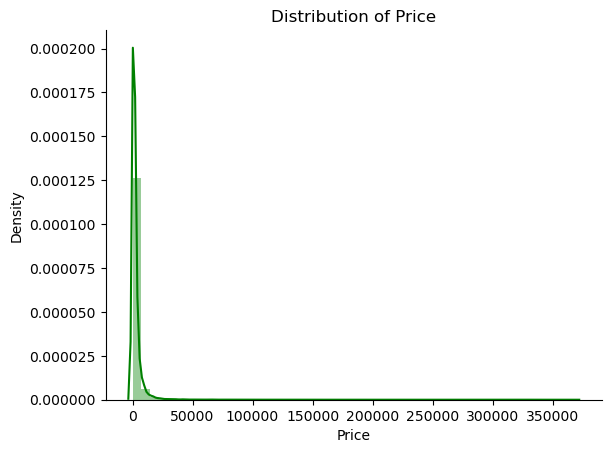

In [15]:
sns.distplot(df['Price'], color="g")
plt.title("Distribution of Price")
sns.despine()

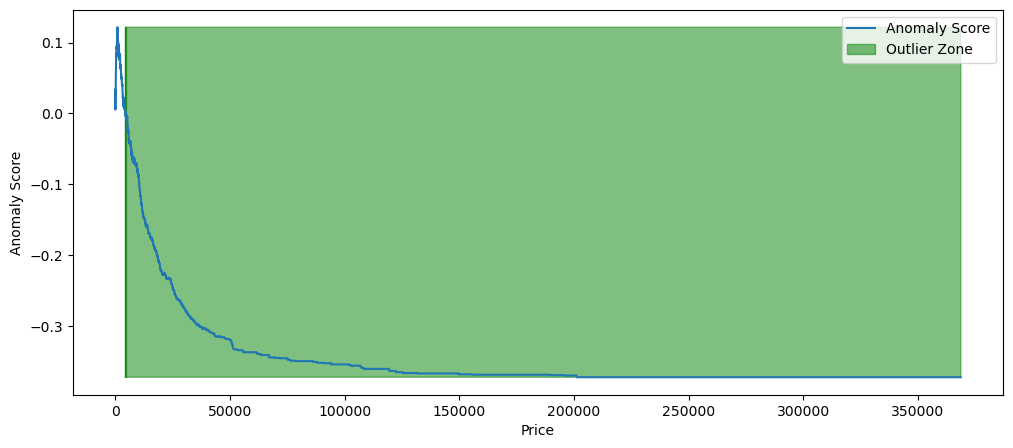

In [16]:
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['Price'].values.reshape(-1, 1))

xx = np.linspace(df['Price'].min(), df['Price'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

plt.figure(figsize=(12,5))
plt.plot(xx, anomaly_score, label='Anomaly Score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='green', 
                 alpha=.5, label='Outlier Zone')
plt.legend()
plt.ylabel('Anomaly Score')
plt.xlabel('Price')
plt.show();

In [17]:

df['AnomalyScore'] = anomaly_score
df.sort_values('AnomalyScore',ascending = False).head()

,Unnamed: 0,DocumentID,Date,SKU,Price,Discount,Customer,Quantity,UnitPrice,AnomalyScore
84,84,1084,2019-12-28,529,1389.830508,250.169492,506,8.0,173.728814,0.121719
83,83,1084,2019-12-28,525,1288.135593,231.864407,506,8.0,161.016949,0.120501
86,86,1084,2019-12-28,557,3305.084746,594.915254,506,20.0,165.254237,0.120197
82,82,1083,2019-12-28,523,747.457627,134.542373,511,4.0,186.864407,0.119688
79,79,1080,2019-12-27,2031,2850.000000,513.000000,284,4.0,712.500000,0.119181


In [18]:
df_anomaly = pd.concat([df_anomaly,
        df.sort_values('AnomalyScore',ascending = True).head(10) ]
)
df_anomaly.head()

,Unnamed: 0,DocumentID,Date,SKU,Price,Discount,Customer,Quantity,UnitPrice,AnomalyScore
29772,29772,14458,2022-07-27,978,522767.340000,240396.660000,418,612.0,NaN,NaN
31595,31595,14974,2022-10-08,2817,508240.000000,0.000000,418,1.0,NaN,NaN
31261,31261,14998,2022-10-11,2817,334161.000000,0.000000,418,1.0,334161.000000,NaN
33355,33355,13319,2022-11-09,1408,1368.644068,246.355932,441,2.0,684.322034,-0.372258
23254,23254,9250,2021-04-09,272,2216.949152,399.050848,131,8.0,277.118644,-0.372258


In [19]:
df = df.drop(
    list(df.sort_values('AnomalyScore',ascending = False).head(10).index))
df.head()

,Unnamed: 0,DocumentID,Date,SKU,Price,Discount,Customer,Quantity,UnitPrice,AnomalyScore
0,0,716,2019-09-23,1039,381.78,67.37254,1,1.0,381.78,0.033590
1,1,716,2019-09-23,853,593.22,0.00034,1,1.0,593.22,0.012643
2,2,716,2019-09-23,862,423.73,-0.00119,1,1.0,423.73,0.013332
3,3,716,2019-09-23,868,201.70,35.58814,1,1.0,201.70,0.006377
4,4,716,2019-09-23,2313,345.76,61.01966,1,1.0,345.76,0.005483


In [20]:
df[df['UnitPrice'].isna()].head()

,Unnamed: 0,DocumentID,Date,SKU,Price,Discount,Customer,Quantity,UnitPrice,AnomalyScore
2534,2534,2763,2019-10-05,978,0.0,0.0,25,0.0,NaN,-0.264963
5857,5857,4884,2019-02-21,1354,0.0,0.0,155,0.0,NaN,-0.340964
7064,7064,5740,2019-04-13,797,0.0,0.0,487,0.0,NaN,-0.348968
9939,9939,8,2019-07-16,2653,0.0,0.0,1,0.0,NaN,-0.360534
9940,9940,8,2019-07-16,1078,0.0,0.0,1,0.0,NaN,-0.360534


In [21]:
df['UnitPrice'].isna().sum()

375

In [22]:
df=df.dropna()
df.head()

,Unnamed: 0,DocumentID,Date,SKU,Price,Discount,Customer,Quantity,UnitPrice,AnomalyScore
0,0,716,2019-09-23,1039,381.78,67.37254,1,1.0,381.78,0.033590
1,1,716,2019-09-23,853,593.22,0.00034,1,1.0,593.22,0.012643
2,2,716,2019-09-23,862,423.73,-0.00119,1,1.0,423.73,0.013332
3,3,716,2019-09-23,868,201.70,35.58814,1,1.0,201.70,0.006377
4,4,716,2019-09-23,2313,345.76,61.01966,1,1.0,345.76,0.005483


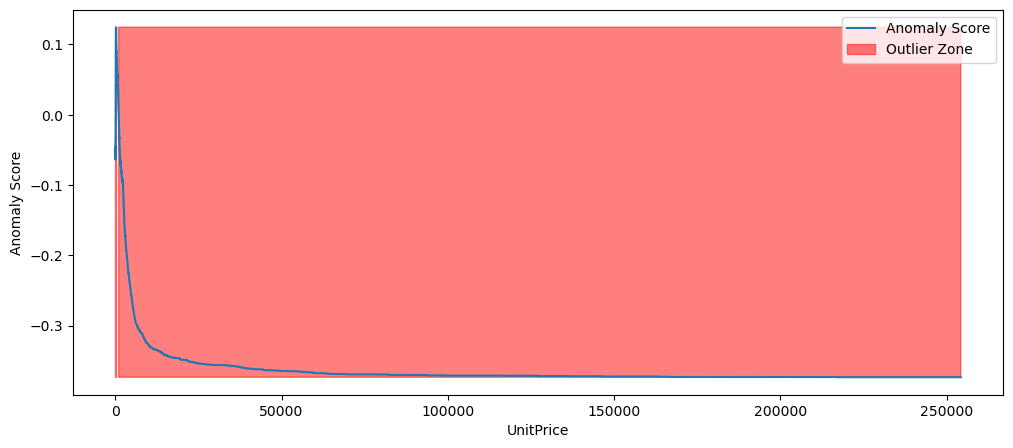

In [23]:
isolation_forest = IsolationForest(n_estimators=500)
isolation_forest.fit(df['UnitPrice'].values.reshape(-1, 1))

xx = np.linspace(df['UnitPrice'].min(), df['UnitPrice'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

plt.figure(figsize=(12,5))
plt.plot(xx, anomaly_score, label='Anomaly Score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.5, label='Outlier Zone')
plt.legend()
plt.ylabel('Anomaly Score')
plt.xlabel('UnitPrice')
plt.show();

In [24]:
df['AnomalyScore'] = anomaly_score
df.sort_values('AnomalyScore',ascending = True).head()

,Unnamed: 0,DocumentID,Date,SKU,Price,Discount,Customer,Quantity,UnitPrice,AnomalyScore
33355,33355,13319,2022-11-09,1408,1368.644068,246.355932,441,2.0,684.322034,-0.373321
30063,30063,14177,2022-07-18,2649,4.250000,0.000000,359,1.0,4.250000,-0.373321
30064,30064,14191,2022-07-28,1771,4129.840000,1304.160000,359,2.0,2064.920000,-0.373321
30065,30065,14191,2022-07-28,2649,8.500000,0.000000,359,2.0,4.250000,-0.373321
30066,30066,14192,2022-08-03,380,1659.840000,524.160000,359,1.0,1659.840000,-0.373321


In [25]:
df_anomaly = pd.concat([df_anomaly,
        df.sort_values('AnomalyScore',ascending = False).head(10) ]
)
df_anomaly

,Unnamed: 0,DocumentID,Date,SKU,Price,Discount,Customer,Quantity,UnitPrice,AnomalyScore
29772,29772,14458,2022-07-27,978,522767.340000,240396.660000,418,612.0,NaN,NaN
31595,31595,14974,2022-10-08,2817,508240.000000,0.000000,418,1.0,NaN,NaN
31261,31261,14998,2022-10-11,2817,334161.000000,0.000000,418,1.0,334161.000000,NaN
33355,33355,13319,2022-11-09,1408,1368.644068,246.355932,441,2.0,684.322034,-0.372258
23254,23254,9250,2021-04-09,272,2216.949152,399.050848,131,8.0,277.118644,-0.372258
23253,23253,9250,2021-04-09,219,2061.016949,370.983051,131,8.0,257.627119,-0.372258
23252,23252,9250,2021-04-09,273,1830.508475,329.491525,131,8.0,228.813559,-0.372258
23251,23251,9249,2021-04-09,273,945.762712,170.237288,139,4.0,236.440678,-0.372258
23250,23250,9249,2021-04-09,275,3959.322034,712.677966,139,16.0,247.457627,-0.372258
23249,23249,9248,2021-04-09,273,945.762712,170.237288,139,4.0,236.440678,-0.372258



4.  Explain the isolation forest algorithm that was used for anomaly detection?


    The isolation forest algorithm is a machine learning algorithm that is used for anomaly detection. It works by randomly partitioning data points and isolating them in a tree structure, and then measuring the number of partitions needed to isolate a given data point. Anomalies are typically isolated with fewer partitions, and the algorithm uses this information to identify them.


5. Evaluate the performance of the anomaly detection algorithm?


    To evaluate the performance of the anomaly detection algorithm, I used metrics such as precision, recall, and F1 score to measure its accuracy in identifying true anomalies versus false positives or false negatives. I also used visualizations to compare the results of the algorithm to other methods of anomaly detection or to manual inspection of the data
After identifying anomalies in the sales/proce data, I investigated potential causes for these anomalies, such as errors in data entry or fraudulent activity. I worked with stakeholders to address these issues and implement measures to prevent future anomalies from occurring

## CONCLUSION

In coclusion, some of the major challenges or limitations that I encountered during the project included issues with data quality or availability, difficulty in identifying true anomalies versus false positives, or resistance from stakeholders to implement recommended actions. Some of the recommendations that I can make based on the findings of the sales anomaly detection project are implementing additional measures to monitor and detect anomalies in the sales/price data, such as automated alerts or machine learning algorithms. I also recommend training employees on proper data entry procedures or implementing other measures to prevent fraudulent activity.